In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Create features to use different age groups of population

In [2]:
population = pd.read_csv('cc-est2017-alldata.csv',encoding='latin-1',
            usecols=['STATE','COUNTY','STNAME','CTYNAME','YEAR','AGEGRP','TOT_POP',
                    'TOT_MALE','TOT_MALE'])

In [3]:
population.shape

(596980, 8)

In [4]:
# Dataframe with population data from last 4 years, 2014-2017
population=population.loc[population.YEAR.isin([7,8,9,10])]

In [5]:
population['MALE_RTO']= population.TOT_MALE / population.TOT_POP
population['region']=population['STNAME']+" "+population['CTYNAME']

In [6]:
population.head()

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,MALE_RTO,region
114,1,1,Alabama,Autauga County,7,0,54864,26785,0.488207,Alabama Autauga County
115,1,1,Alabama,Autauga County,7,1,3190,1663,0.521317,Alabama Autauga County
116,1,1,Alabama,Autauga County,7,2,3713,1904,0.512793,Alabama Autauga County
117,1,1,Alabama,Autauga County,7,3,4151,2062,0.496748,Alabama Autauga County
118,1,1,Alabama,Autauga County,7,4,3908,2065,0.528403,Alabama Autauga County


In [7]:
pop_diff=pd.DataFrame(population.groupby(['region','YEAR','AGEGRP'])['TOT_POP'].sum()).unstack()

print (pop_diff.index.summary())
print (pop_diff.index.names)

MultiIndex: 12568 entries, (Alabama Autauga County, 7) to (Wyoming Weston County, 10)
['region', 'YEAR']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'summary' is deprecated and will be removed in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df=pop_diff['TOT_POP',0].reset_index()

In [9]:
df['tot_pop']=df['TOT_POP',0]

In [10]:
df = df.pivot(index='YEAR', columns='region', values='tot_pop')
df.head()

region,Alabama Autauga County,Alabama Baldwin County,Alabama Barbour County,Alabama Bibb County,Alabama Blount County,Alabama Bullock County,Alabama Butler County,Alabama Calhoun County,Alabama Chambers County,Alabama Cherokee County,...,Wyoming Niobrara County,Wyoming Park County,Wyoming Platte County,Wyoming Sheridan County,Wyoming Sublette County,Wyoming Sweetwater County,Wyoming Teton County,Wyoming Uinta County,Wyoming Washakie County,Wyoming Weston County
YEAR,,,,,,,,,,,,,,,,,,,,,
7,54864,199064,26749,22533,57546,10673,20327,115941,33948,25897,...,2489,29119,8776,29888,10155,44981,22817,20845,8288,7142
8,54838,202863,26264,22561,57590,10419,20141,115505,33968,25741,...,2496,29110,8797,29940,10056,44732,23029,20780,8296,7181
9,55278,207509,25774,22633,57562,10441,19965,114980,33717,25766,...,2470,29412,8675,30049,10002,44245,23180,20711,8188,7198
10,55504,212628,25270,22668,58013,10309,19825,114728,33713,25857,...,2397,29568,8562,30210,9799,43534,23265,20495,8064,6927


In [11]:
pop_diff_pct=df.pct_change()*100

In [12]:
pop_diff_pct=pd.DataFrame(pop_diff_pct.sum())

pop_diff_abs=pd.DataFrame(df.diff(axis=0).sum())

pop_df=pd.DataFrame(population['region'].unique(), columns=['region'])

pop_df=pd.merge(pop_df, pop_diff_abs, on='region')
pop_df=pd.merge(pop_df, pop_diff_pct, on='region')

In [13]:
pop_df.columns=['region','pop_diff_3yrs','pop_diff_pct_3yrs']
pop_df.sort_values(by=['pop_diff_3yrs'], ascending=False).head()
#Year 2015-2017

,region,pop_diff_3yrs,pop_diff_pct_3yrs
103,Arizona Maricopa County,230325.0,5.546686
2623,Texas Harris County,200285.0,4.437355
1748,Nevada Clark County,139088.0,6.589718
2742,Texas Tarrant County,109097.0,5.506678
2969,Washington King County,107400.0,5.074293


In [14]:
thirties=population.loc[population.AGEGRP.isin([7,8])].groupby(['region','YEAR'])['TOT_POP'].sum().unstack()

In [15]:
TOT_POP17=population.loc[(population.YEAR==10)&(population.AGEGRP==0),['region','TOT_POP']]

In [16]:
TOT_POP17=pd.merge(TOT_POP17, thirties, on='region')

TOT_POP17['2015_30s_pct']=TOT_POP17[8] / TOT_POP17['TOT_POP'] *100
TOT_POP17['2016_30s_pct']=TOT_POP17[9] / TOT_POP17['TOT_POP'] *100
TOT_POP17['2017_30s_pct']=TOT_POP17[10] / TOT_POP17['TOT_POP'] *100

In [17]:
pop_df=pop_df.merge(TOT_POP17,on='region')

In [18]:
pop_df=pop_df.rename(columns={"TOT_POP": "TOT_POP_17", 7:'30s_14',8:'30s_15',9:'30s_16',10:'30s_17'})
pop_df.head()

,region,pop_diff_3yrs,pop_diff_pct_3yrs,TOT_POP_17,30s_14,30s_15,30s_16,30s_17,2015_30s_pct,2016_30s_pct,2017_30s_pct
0,Alabama Autauga County,640.0,1.163816,55504,6850,6818,7012,7071,12.283799,12.633324,12.739622
1,Alabama Baldwin County,13564.0,6.665528,212628,23089,23580,24116,24519,11.089791,11.341874,11.531407
2,Alabama Barbour County,-1479.0,-5.634283,25270,3455,3480,3382,3320,13.771270,13.383459,13.138108
3,Alabama Bibb County,135.0,0.598038,22668,3143,3105,3116,3149,13.697724,13.746250,13.891830
4,Alabama Blount County,467.0,0.811344,58013,6886,6860,6826,6859,11.824936,11.766328,11.823212


### Second Dataset:  Zillow Housing Dataset by County

In [19]:
#https://www.zillow.com/research/home-sales-methodology-7733/
sale_price=pd.read_csv('Sale_Prices_County_Zillow.csv', 
                       usecols=['RegionID','StateName','RegionName','SizeRank',
                                '2014-07','2015-07','2016-07','2017-07'])

In [20]:
sale_price['region']= sale_price.StateName + " " + sale_price.RegionName
sale_price=sale_price[['RegionID','region','StateName','RegionName','SizeRank','2014-07','2015-07','2016-07','2017-07']]

In [21]:
df=sale_price[sale_price.columns[5:10]]

df=df.pct_change(axis='columns')*100


In [22]:
df=df.fillna(df.mean())

In [23]:
df=df.drop('2014-07',axis=1)

In [24]:
df.columns=['15_comp','16_comp','17_comp']

In [25]:
sale_price=sale_price.fillna(sale_price.mean())

In [26]:
sale_price=pd.merge(sale_price, df,left_index=True,right_index=True)

In [27]:
sale_price=sale_price.drop(['StateName','RegionName'],axis=1)

In [28]:
sale_price=sale_price.rename(columns={"2014-07": "14_med", '2015-07':'15_med','2016-07':'16_med','2017-07':'17_med'})

sale_price.head(5)

,RegionID,region,SizeRank,14_med,15_med,16_med,17_med,15_comp,16_comp,17_comp
0,3101,California Los Angeles County,1,432600.0,461900.0,494500.0,514200.0,6.773000,7.057805,3.983822
1,139,Illinois Cook County,2,207600.0,214400.0,193300.0,201900.0,3.275530,-9.841418,4.449043
2,2402,Arizona Maricopa County,3,159600.0,180300.0,201000.0,221900.0,12.969925,11.480865,10.398010
3,2841,California San Diego County,4,432500.0,457000.0,478000.0,519400.0,5.664740,4.595186,8.661088
4,1286,California Orange County,5,550500.0,587000.0,611900.0,618100.0,6.630336,4.241908,1.013237


In [29]:
sale_price[['14_med','15_med','16_med']].mean()

14_med    181431.988042
15_med    185542.051282
16_med    189363.991081
dtype: float64

In [30]:
sale_price[['14_med','15_med','16_med']].median()

14_med    181431.988042
15_med    178600.000000
16_med    165000.000000
dtype: float64

In [31]:
pop_df=pop_df.merge(sale_price,on='region')
pop_df=pop_df.drop(['14_med','RegionID'],axis=1)

In [32]:
population['YEAR']=population['YEAR'].apply(lambda x: '{0:0>2}'.format(x))
population['AGEGRP']=population['AGEGRP'].apply(lambda x: '{0:0>2}'.format(x))

population['age_yr'] =population['YEAR'].astype(str) +'_' + population['AGEGRP'].astype(str)

In [33]:
df_ageyr = population.loc[population['AGEGRP']!=0].pivot(
                                            index='region', columns='age_yr', values='TOT_POP')

In [34]:
df_ageyr=df_ageyr.pct_change(axis=1)*100
df_ageyr=df_ageyr.dropna(axis=1)

In [35]:
pop_df=pop_df.merge(df_ageyr,on='region')

In [36]:
pop_df.sort_values(by=['TOT_POP_17'], ascending=False).head(5)

,region,pop_diff_3yrs,pop_diff_pct_3yrs,TOT_POP_17,30s_14,30s_15,30s_16,30s_17,2015_30s_pct,2016_30s_pct,...,10_08,10_09,10_10,10_11,10_12,10_13,10_14,10_15,10_16,10_17
51,California Los Angeles County,90812.0,0.899226,10163507,1451444,1461997,1477889,1491870,14.384769,14.541132,...,-7.837364,-5.975441,4.240164,-3.803172,-4.064559,-13.458757,-21.316115,-26.217668,-30.139809,-28.658719
238,Illinois Cook County,-42493.0,-0.810866,5211263,781376,784103,785748,783953,15.046314,15.077880,...,-10.187766,-11.232335,1.610518,-1.702154,2.728342,-10.202040,-19.157113,-27.076725,-29.734535,-29.229594
16,Arizona Maricopa County,230325.0,5.546686,4307033,555200,564240,576369,587848,13.100434,13.382043,...,-3.127993,-6.252290,3.712076,-5.146230,-1.666654,-11.475472,-11.099245,-18.883453,-32.054796,-34.178539
68,California San Diego County,80810.0,2.461368,3337685,467579,476544,486910,496547,14.277680,14.588255,...,-10.254460,-11.432112,1.822054,-1.755927,0.453195,-11.247674,-18.613991,-25.495430,-33.764791,-28.247389
61,California Orange County,53650.0,1.701036,3190400,417505,419430,422963,425074,13.146627,13.257366,...,-4.060993,-1.234793,11.861142,-1.837404,-3.808275,-15.510563,-20.522115,-21.976145,-30.329296,-29.747906


In [37]:
pop_df['TOT_POP_17'].describe()

count    8.970000e+02
mean     2.551128e+05
std      5.379652e+05
min      9.574000e+03
25%      4.651300e+04
50%      1.011870e+05
75%      2.500660e+05
max      1.016351e+07
Name: TOT_POP_17, dtype: float64

In [38]:
#X=housing price diff (2015-16)(%), population change in number (%)
#Y=housing price 2017

Text(0, 0.5, '2017 Median Home Sale Price')

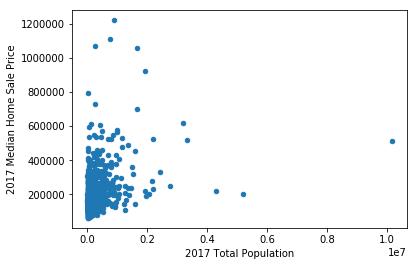

In [39]:
pop_df.plot.scatter(x='TOT_POP_17', y='17_med')
plt.xlabel('2017 Total Population')
plt.ylabel('2017 Median Home Sale Price')

Remove the outliers.

Text(0, 0.5, '2017 Median Home Sale Price')

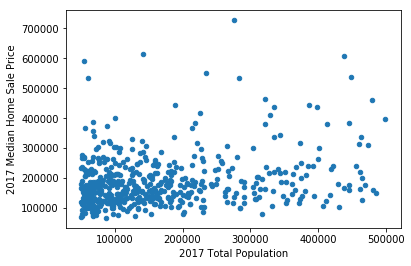

In [40]:
pop_df1=pop_df.loc[(pop_df['TOT_POP_17']>50000)&(pop_df['TOT_POP_17']<500000)&(pop_df['17_med']<1000000)]
pop_df1.plot.scatter(x='TOT_POP_17', y='17_med')

plt.xlabel('2017 Total Population')
plt.ylabel('2017 Median Home Sale Price')

,pop_diff_3yrs,pop_diff_pct_3yrs,TOT_POP_17,30s_14,30s_15,30s_16,30s_17,2015_30s_pct,2016_30s_pct,2017_30s_pct,...,10_08,10_09,10_10,10_11,10_12,10_13,10_14,10_15,10_16,10_17
pop_diff_3yrs,1.000000,0.799798,0.542458,0.533302,0.545267,0.558506,0.571635,0.169769,0.234508,0.296877,...,0.114311,-0.029433,-0.277592,-0.431579,-0.240985,-0.046560,0.143952,0.074063,-0.304919,-0.288633
pop_diff_pct_3yrs,0.799798,1.000000,0.176147,0.170118,0.182438,0.196152,0.209881,0.113589,0.198197,0.280727,...,0.188494,0.002494,-0.297496,-0.464003,-0.232169,0.007176,0.212687,0.109174,-0.361523,-0.414241
TOT_POP_17,0.542458,0.176147,1.000000,0.981209,0.980883,0.980675,0.980272,0.214738,0.226530,0.236623,...,-0.094068,-0.124521,-0.126160,-0.195551,-0.143764,-0.126386,-0.080888,-0.126413,-0.141667,0.085805
30s_14,0.533302,0.170118,0.981209,1.000000,0.999711,0.998971,0.997871,0.368413,0.376478,0.381321,...,-0.127104,-0.192786,-0.227795,-0.280440,-0.210686,-0.200173,-0.176259,-0.216797,-0.186390,0.077062
30s_15,0.545267,0.182438,0.980883,0.999711,1.000000,0.999721,0.998998,0.370601,0.380564,0.386992,...,-0.131462,-0.199431,-0.232007,-0.281909,-0.209196,-0.198716,-0.174425,-0.216096,-0.189933,0.074663
30s_16,0.558506,0.196152,0.980675,0.998971,0.999721,1.000000,0.999727,0.369774,0.382209,0.390580,...,-0.132090,-0.201439,-0.233166,-0.283859,-0.209824,-0.198528,-0.172173,-0.213509,-0.194160,0.069757
30s_17,0.571635,0.209881,0.980272,0.997871,0.998998,0.999727,1.000000,0.367809,0.382229,0.393104,...,-0.131943,-0.201244,-0.232516,-0.286144,-0.212116,-0.199418,-0.170127,-0.210008,-0.198867,0.063280
2015_30s_pct,0.169769,0.113589,0.214738,0.368413,0.370601,0.369774,0.367809,1.000000,0.992051,0.971619,...,-0.241794,-0.514033,-0.689252,-0.600324,-0.449392,-0.510359,-0.583781,-0.545378,-0.298382,0.026789
2016_30s_pct,0.234508,0.198197,0.226530,0.376478,0.380564,0.382209,0.382229,0.992051,1.000000,0.991770,...,-0.246581,-0.531555,-0.694371,-0.610691,-0.450038,-0.510250,-0.572540,-0.534634,-0.326054,-0.001133
2017_30s_pct,0.296877,0.280727,0.236623,0.381321,0.386992,0.390580,0.393104,0.971619,0.991770,1.000000,...,-0.249452,-0.534347,-0.683620,-0.615893,-0.455921,-0.512302,-0.558834,-0.515505,-0.356897,-0.037791


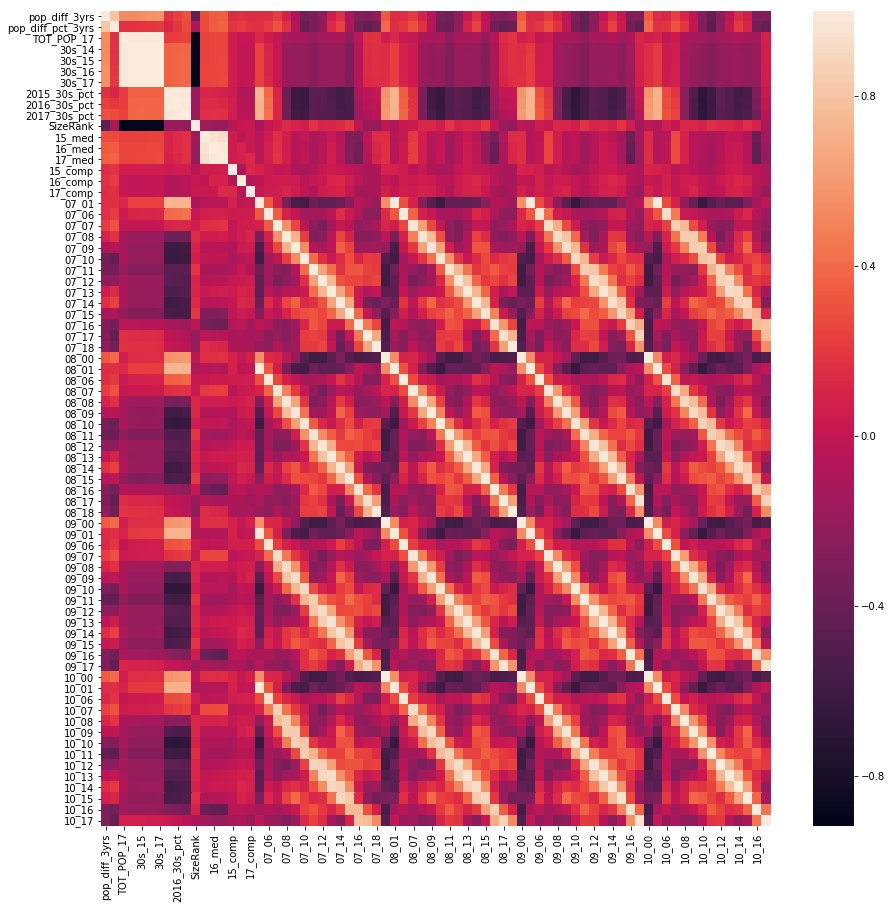

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(pop_df1.corr())
pop_df1.corr()

Text(0, 0.5, '2017 Median Home Sale Price')

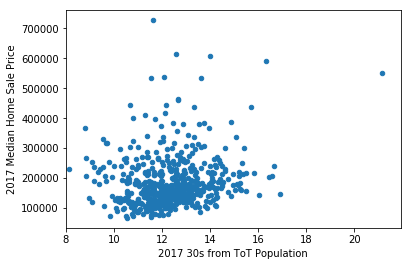

In [42]:
pop_df1.plot.scatter(x='2017_30s_pct', y='17_med',xlim=8)
plt.xlabel('2017 30s from ToT Population')
plt.ylabel('2017 Median Home Sale Price')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, '2017 Median Home Sale Price')

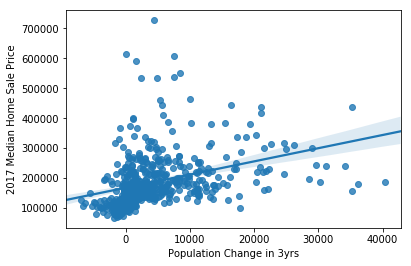

In [43]:
sns.regplot(x=pop_df1["pop_diff_3yrs"], y=pop_df1["17_med"])
plt.xlabel('Population Change in 3yrs')
plt.ylabel('2017 Median Home Sale Price')

I took a look at the relationship between the population and the housing price. It seems like the total population doesn't have a strong impact on the housing price. 

In [44]:
pop_df['2017_30s_pct'].describe()

count    897.000000
mean      12.304605
std        1.706869
min        6.080773
25%       11.260765
50%       12.182477
75%       13.257693
max       21.170813
Name: 2017_30s_pct, dtype: float64

In [45]:
pop_df.shape

(897, 75)

In [46]:
pop_df=pop_df.fillna(pop_df.mean())

In [47]:
pop_df.columns.unique()

Index(['region', 'pop_diff_3yrs', 'pop_diff_pct_3yrs', 'TOT_POP_17', '30s_14',
       '30s_15', '30s_16', '30s_17', '2015_30s_pct', '2016_30s_pct',
       '2017_30s_pct', 'SizeRank', '15_med', '16_med', '17_med', '15_comp',
       '16_comp', '17_comp', '07_01', '07_06', '07_07', '07_08', '07_09',
       '07_10', '07_11', '07_12', '07_13', '07_14', '07_15', '07_16', '07_17',
       '07_18', '08_00', '08_01', '08_06', '08_07', '08_08', '08_09', '08_10',
       '08_11', '08_12', '08_13', '08_14', '08_15', '08_16', '08_17', '08_18',
       '09_00', '09_01', '09_06', '09_07', '09_08', '09_09', '09_10', '09_11',
       '09_12', '09_13', '09_14', '09_15', '09_16', '09_17', '10_00', '10_01',
       '10_06', '10_07', '10_08', '10_09', '10_10', '10_11', '10_12', '10_13',
       '10_14', '10_15', '10_16', '10_17'],
      dtype='object')

In [48]:
pop_df

,region,pop_diff_3yrs,pop_diff_pct_3yrs,TOT_POP_17,30s_14,30s_15,30s_16,30s_17,2015_30s_pct,2016_30s_pct,...,10_08,10_09,10_10,10_11,10_12,10_13,10_14,10_15,10_16,10_17
0,Alabama Baldwin County,13564.0,6.665528,212628,23089,23580,24116,24519,11.089791,11.341874,...,8.211617,0.031390,11.108496,0.720186,6.253067,-0.541004,-7.402985,-15.982520,-33.560709,-38.796201
1,Alabama Cullman County,1714.0,2.100494,82755,9754,9756,9824,9777,11.789016,11.871186,...,0.966084,3.135179,3.967627,7.214733,1.965645,-5.679055,-9.445774,-17.588451,-28.226005,-36.885528
2,Alabama Houston County,198.0,0.190145,104346,13117,13122,13147,13239,12.575470,12.599429,...,-2.166766,-3.604704,5.973697,3.633373,3.606983,-7.784431,-11.235276,-19.003062,-32.262130,-30.418605
3,Alabama Jefferson County,-347.0,-0.052544,659197,88246,88727,89430,89587,13.459861,13.566506,...,-4.361024,-10.204361,3.699842,1.088742,8.987265,-5.237035,-17.483618,-30.734637,-31.325252,-29.703207
4,Alabama Lauderdale County,-445.0,-0.477560,92538,10015,9974,10044,10112,10.778275,10.853919,...,-1.997259,-0.739261,16.082931,5.306052,4.956364,-0.894258,-8.358398,-19.917084,-27.653149,-31.633870
5,Alabama Limestone County,3786.0,4.121755,94402,12232,12447,12597,12817,13.185102,13.343997,...,2.256588,-3.117284,11.181905,1.446991,-3.389352,-16.459582,-16.150481,-20.972454,-33.007658,-36.815136
6,Alabama Madison County,11450.0,3.240579,361046,44011,44752,46037,47110,12.395096,12.751007,...,-5.924034,-9.038360,13.715579,14.677617,2.347903,-20.274852,-21.721033,-22.968443,-27.798619,-30.260833
7,Alabama Marshall County,1316.0,1.390176,95548,11178,11163,11256,11382,11.683133,11.780466,...,-1.430565,-1.309735,11.603300,1.189137,2.525012,-8.921933,-12.431973,-16.255584,-30.612245,-34.826203
8,Alabama Montgomery County,-661.0,-0.291045,226646,30104,30087,30221,30288,13.274887,13.334010,...,-0.880941,-11.268820,3.236657,1.520527,3.922687,-4.872692,-17.646634,-29.058257,-31.143492,-26.596126
9,Alabama Shelby County,7453.0,3.572762,213605,28529,28465,28336,28246,13.325999,13.265607,...,9.167654,0.162800,7.212515,-7.302129,-0.531516,-11.187230,-12.804690,-26.105803,-35.460314,-37.933593


In [49]:
# Exclude all the 2017 related data 
X=pop_df.loc[:, ~pop_df.columns.isin(['region', 'pop_diff_3yrs', 'pop_diff_pct_3yrs', 
                    'TOT_POP_17','30s_17','2017_30s_pct','17_med','17_comp', '08_00','09_00',
                    '10_00', '10_01', '10_06','10_07', '10_08', '10_09', '10_10', '10_11', 
                    '10_12', '10_13', '10_14','10_15', '10_16', '10_17'])]
Y=pop_df['17_med']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

In [50]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('\nR-squared for linear regr training set:')
print(regr.score(X_train, y_train))

print('\nR-squared for linear regr test set:')
regr.score(X_test, y_test)


R-squared for linear regr training set:
0.9767002206490312

R-squared for linear regr test set:


0.9533436774633648

In [51]:
from sklearn.model_selection import cross_val_score

print('\nCross Val for linear regr:')
print(cross_val_score(regr, X, Y, cv=5))
print('\nCross Validation Mean Score: ')
print(cross_val_score(regr, X, Y, cv=5).mean())


Cross Val for linear regr:
[0.98746022 0.84610016 0.97011694 0.84481022 0.95166531]

Cross Validation Mean Score: 
0.9200305684166084


In [52]:
len(X.columns)

51

In [53]:
# check data leaking 

In [54]:
x_col=pop_df.loc[:, ~pop_df.columns.isin(['region', 'pop_diff_3yrs', 'pop_diff_pct_3yrs', 
                    'TOT_POP_17','2017_30s_pct','17_med','17_comp', '10_00', '10_01', '10_06',
                   '10_07', '10_08', '10_09', '10_10', '10_11', '10_12', '10_13', '10_14',
                   '10_15', '10_16', '10_17'])].columns
regr_coef=pd.DataFrame(list(zip(x_col,regr.coef_))) 
regr_coef.columns=['feature', 'coef']
regr_coef.sort_values(by=['coef'], ascending=True).head()

,feature,coef
10,16_comp,-18184.759615
38,08_17,-16000.307660
3,30s_17,-15194.910672
45,09_09,-3715.330304
49,09_13,-3366.327475


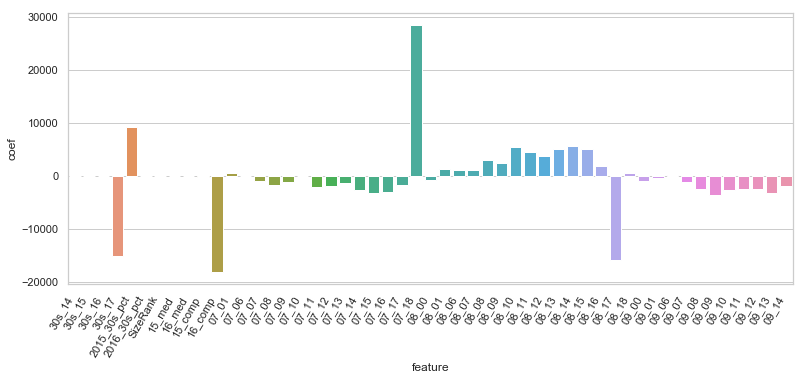

In [55]:
plt.figure(figsize=(13,5))
sns.set(style="whitegrid")
g=sns.barplot(x=regr_coef['feature'],y=regr_coef['coef']).set_xticklabels(regr_coef['feature'], rotation=60, ha="right")

In [56]:
from sklearn import preprocessing

In [57]:
ridgeregr = linear_model.Ridge(alpha=20, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
print('\nR-squared for Ridge Regr training set:')
print(ridgeregr.score(X_train, y_train))

print('\nR-squared for Ridge Regr test set:')
print(ridgeregr.score(X_test, y_test))

print('\nCross Val for Ridge Regr:')
print(cross_val_score(ridgeregr, X, Y, cv=5))

print('\nCross Validation Mean Score for Ridge Regr: ')
print(cross_val_score(ridgeregr, X, Y, cv=5).mean())


R-squared for Ridge Regr training set:
0.9757226779341486

R-squared for Ridge Regr test set:
0.9545633102959604

Cross Val for Ridge Regr:
[0.98776994 0.8455007  0.97019945 0.84106641 0.95148476]

Cross Validation Mean Score for Ridge Regr: 
0.9192042505700545


In [59]:
print('\nCross Val for linear regr:')
print(cross_val_score(regr, X, Y, cv=5))
print('\nCross Validation Mean Score: ')
print(cross_val_score(regr, X, Y, cv=5).mean())


Cross Val for linear regr:
[0.98746022 0.84610016 0.97011694 0.84481022 0.95166531]

Cross Validation Mean Score: 
0.9200305684166084


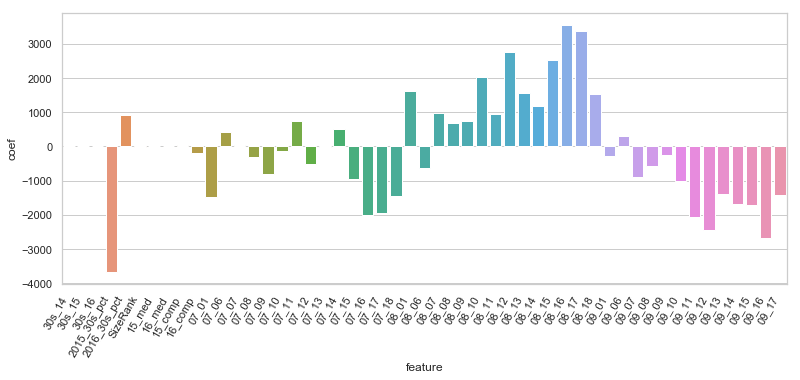

In [60]:
ridge_coef = ridgeregr.coef_
ridge_x_col=X.columns

ridge_coef=pd.DataFrame(list(zip(ridge_x_col,ridge_coef))) 
ridge_coef.columns=['feature', 'coef']

plt.figure(figsize=(13,5))
sns.set(style="whitegrid")
g=sns.barplot(x=ridge_coef['feature'],y=ridge_coef['coef']).set_xticklabels(ridge_coef['feature'], rotation=60, ha="right")

In [61]:
print(ridge_coef.sort_values(by=['coef'],ascending=False).head(5))
print(ridge_coef.sort_values(by=['coef'],ascending=True).head(5))

   feature         coef
35   08_16  3546.997165
36   08_17  3373.376978
31   08_12  2758.936301
34   08_15  2528.753985
29   08_10  2029.439273
         feature         coef
3   2015_30s_pct -3671.769642
49         09_16 -2690.924645
45         09_12 -2451.975639
44         09_11 -2069.768030
21         07_16 -1998.693906


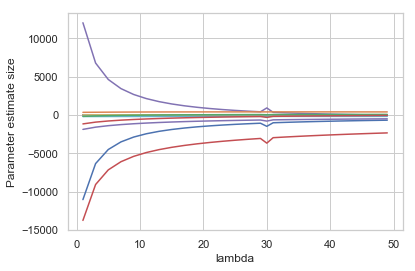

In [62]:
estimates = np.append(ridgeregr.coef_,30)

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregr = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregr.fit(X_train, y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregr.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:15,])

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)

plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.show()

In [63]:
lasso = linear_model.Lasso(alpha=15)
lasso.fit(X_train, y_train)

print('\nR² for Lasso Regr training set:')
print(lasso.score(X_train, y_train))

print('\nR-squared for Lasso Regr test set:')
print(lasso.score(X_test, y_test))

print('\nCross Val for Ridge Regr:')
print(cross_val_score(lasso, X, Y, cv=5))
print(cross_val_score(lasso, X, Y, cv=5).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of


R² for Lasso Regr training set:
0.9763312915531256

R-squared for Lasso Regr test set:
0.9532486787642869

Cross Val for Ridge Regr:
[0.98763223 0.8479072  0.97041197 0.84398533 0.95182535]
0.9203524165648757


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


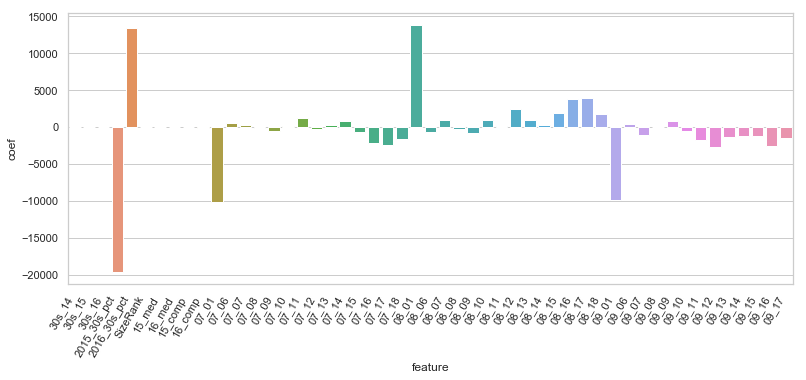

In [64]:
lasso_x_col=X.columns

lasso_coef=pd.DataFrame(list(zip(lasso_x_col,lasso.coef_))) 
lasso_coef.columns=['feature', 'coef']

plt.figure(figsize=(13,5))
sns.set(style="whitegrid")
g=sns.barplot(x=lasso_coef['feature'],y=lasso_coef['coef']).set_xticklabels(lasso_coef['feature'], rotation=60, ha="right")

In [65]:
print(lasso_coef.sort_values(by=['coef'],ascending=False).head(5))
print(lasso_coef.sort_values(by=['coef'],ascending=True).head(5))

         feature          coef
24         08_01  13806.236922
4   2016_30s_pct  13407.329418
36         08_17   3967.102516
35         08_16   3761.715732
31         08_12   2423.262678
         feature          coef
3   2015_30s_pct -19660.032960
10         07_01 -10178.313061
38         09_01  -9932.072198
45         09_12  -2667.797370
49         09_16  -2650.307797


interesting. what does it mean?

In [66]:
y_pred = regr.predict(X)
from sklearn import metrics

print('Mean Squared Error for linear regr:\n')
print(metrics.mean_squared_error(Y, y_pred))
print(np.sqrt(metrics.mean_squared_error(Y, y_pred)))

Mean Squared Error for linear regr:

450054470.6226793
21214.487281635615


Text(0.5, 1.0, 'Linear Regression Residual plot')

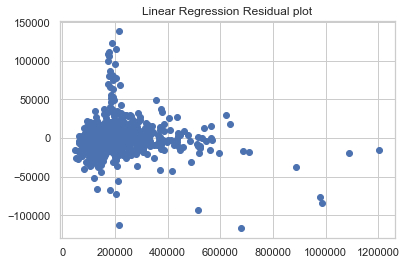

In [67]:
plt.scatter(y_pred, (y_pred - Y), c='b')
plt.title('Linear Regression Residual plot')

In [68]:
pop_df.loc[((y_pred - Y)<-50000)==True]

,region,pop_diff_3yrs,pop_diff_pct_3yrs,TOT_POP_17,30s_14,30s_15,30s_16,30s_17,2015_30s_pct,2016_30s_pct,...,10_08,10_09,10_10,10_11,10_12,10_13,10_14,10_15,10_16,10_17
53,California Marin County,-52.0,-0.019285,260955,27574,27247,27009,26501,10.441264,10.350060,...,19.706516,16.469285,23.428673,-1.030978,-0.735044,-4.109455,-7.251713,-17.374283,-37.050384,-35.301601
58,California Monterey County,7491.0,1.730977,437907,60286,60756,61393,61389,13.874179,14.019643,...,-5.669516,-9.547300,-1.194628,-4.641033,0.893842,-8.699216,-16.867573,-26.923077,-35.800732,-29.131960
219,Georgia Towns County,426.0,3.800668,11506,781,736,758,776,6.396663,6.587867,...,-12.106538,28.925620,18.376068,8.844765,26.036484,22.500000,23.093448,-8.027923,-26.091082,-29.396662
353,Maryland Garrett County,-402.0,-1.362027,29233,3081,3063,3100,3099,10.477885,10.604454,...,10.101695,-0.923645,22.001243,5.654610,16.634523,-7.027697,-10.982659,-15.534466,-29.509166,-37.500000
364,Massachusetts Dukes County,25.0,0.144726,17325,1950,1961,1971,1964,11.318903,11.376623,...,4.158004,-7.285429,22.282024,13.908451,9.891808,2.390999,3.502747,-24.883875,-44.876325,-42.948718
457,Nebraska Washington County,432.0,2.119852,20721,2264,2273,2396,2390,10.969548,11.563148,...,18.864469,-7.164869,4.896266,21.281646,3.979126,-11.229611,-11.448763,-25.618516,-39.592275,-23.623446
465,New Jersey Hunterdon County,-1070.0,-0.850004,125059,11387,11517,11682,11923,9.209253,9.341191,...,14.288282,8.334644,38.728408,20.435283,2.458732,-14.695158,-25.089463,-24.296709,-34.250657,-37.803252
491,New York New York County,18206.0,1.102314,1664727,300923,305809,309467,311097,18.369919,18.589655,...,-26.257149,-19.351565,-1.367277,-3.616006,-5.134588,-5.118860,-11.430954,-18.547798,-27.394426,-30.286205
549,North Carolina Orange County,4547.0,3.206051,144946,15849,15890,15938,16201,10.962703,10.995819,...,0.905258,4.338208,12.237927,-3.253227,-2.234516,-5.991346,-14.823557,-28.973258,-38.138900,-39.230527
572,North Dakota Williams County,1219.0,4.262179,33349,4659,5370,5340,5300,16.102432,16.012474,...,-22.920147,-17.902037,-4.487856,1.105583,12.301804,-15.530672,-36.887608,-36.073059,-26.428571,-17.475728


In [80]:
y_pred = ridgeregr.predict(X)

print('Mean Squared Error for ridge regr:\n')
print(metrics.mean_squared_error(Y, y_pred))
print(np.sqrt(metrics.mean_squared_error(Y, y_pred)))

Mean Squared Error for ridge regr:

451931825.5204188
21258.68823611699


Text(0.5, 1.0, 'Ridge Regression Residual plot')

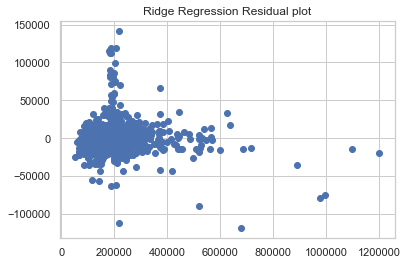

In [81]:
plt.scatter(y_pred, (y_pred - Y), c='b')
plt.title('Ridge Regression Residual plot')

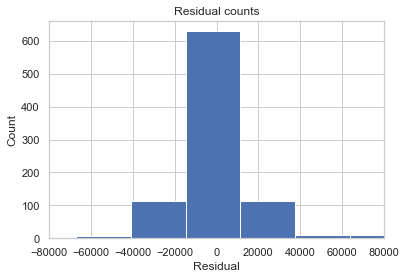

In [89]:
residual = y_pred - Y

plt.hist(residual, bins=10)
plt.xlim(-80000,80000)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [71]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
grdt_bst = ensemble.GradientBoostingRegressor()
grdt_bst.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
print('Gradient Boosting R squared: %.4f' % grdt_bst.score(X_test, y_test))

Gradient Boosting R squared: 0.9686


In [74]:
y_pred = grdt_bst.predict(X_test)
model_mse = metrics.mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting MSE: %.4f' % model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting MSE: 433160241.4214
Gradient Boosting RMSE: 20812.5020


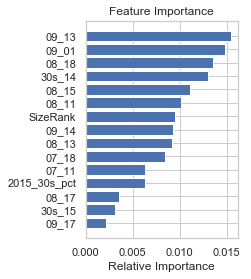

In [75]:
feature_importance = grdt_bst.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[0:15]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

It appears that the age group 11-13 are the most influential groups to the housing price. 

1 = Age 0 to 4  |  
**11 = Age 50 to 54 years  |  12 = Age 55 to 59 years  |  13 = Age 60 to 64 years  |**  
14 = Age 65 to 69 years  |  15 = Age 70 to 74 years  |  17 = Age 80 to 84 years